# **1- Importing required libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
from wordcloud import WordCloud

sns.set(style="darkgrid")

# **2- Reading data**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
store_data = pd.read_csv("/content/drive/MyDrive/For Colab/SampleSuperstore.csv")

In [5]:
store_data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# **3- Checking meta information of dataframe**

In [6]:
store_data.shape

(9994, 13)

In [7]:
store_data.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

## **4- Checking statistical information of dataframe**

In [8]:
store_data.describe()[["Sales","Quantity", 'Discount', 'Profit']].T.style.bar(subset=['mean'], color='#205ff2')\
                                                .background_gradient(subset=['std'], cmap='Reds')\
                                                .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
Sales,9994.000000,229.858001,623.245101,0.444000,17.280000,54.490000,209.940000,22638.480000
Quantity,9994.000000,3.789574,2.225110,1.000000,2.000000,3.000000,5.000000,14.000000
Discount,9994.000000,0.156203,0.206452,0.000000,0.000000,0.200000,0.200000,0.800000
Profit,9994.000000,28.656896,234.260108,-6599.978000,1.728750,8.666500,29.364000,8399.976000


## **5- Checking for NaN values**

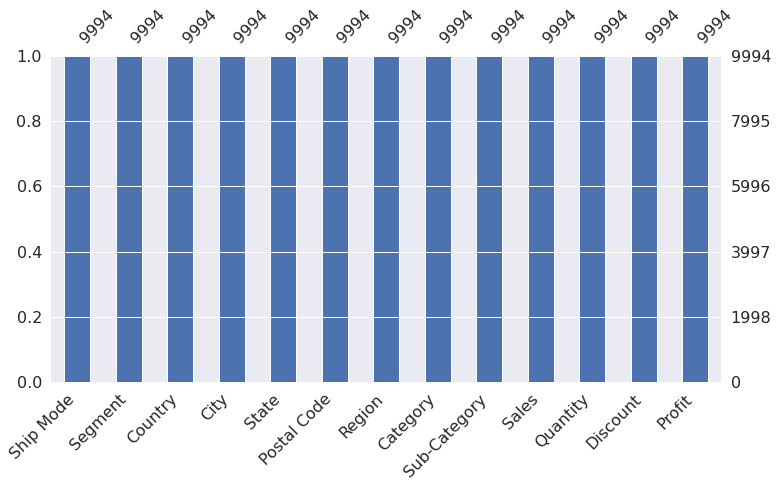

In [9]:
msno.bar(store_data, color='b', figsize = (12,6));

**So none of the column contains NaN value**

# **6- Visualization**

In [10]:
store_data['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [11]:
px.histogram(store_data,
             x = "Ship Mode",
             color='Segment',
             title = "<b>Counts in Ship Mode</b>",)

**Above histogram shows that Ship Mode has 4 categories and Standard Class has more counts then others. Also In Standard Class more Segmants belongs to Consumer class then Corporate and then Home Office**

## **6.1- Analyze Segment**

In [12]:
store_data['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [13]:
fig = px.pie(store_data, names = "Segment",
             title = "<b>Counts in Segment</b>",
             hole = 0.5)

fig.show()

## **6.2- Analyzing which product Sub-category has more profit**

In [14]:
prod_wise = store_data[["Sub-Category", "Profit"]].groupby(['Sub-Category'],
                                                      as_index=False).sum().sort_values(by='Profit',
                                                                                        ascending=False)


px.bar(data_frame = prod_wise, x = "Sub-Category", y = "Profit",
       color="Sub-Category",
       title = "<b>Product Category Vs Profit</b>")

In [15]:
px.pie(data_frame = prod_wise,
       names = "Sub-Category",
       hover_data=['Profit'],)

In [16]:
prod_wise.reset_index().drop("index", axis = 1).style.bar()

,Sub-Category,Profit
0,Copiers,55617.824900
1,Phones,44515.730600
2,Accessories,41936.635700
3,Paper,34053.569300
4,Binders,30221.763300
5,Chairs,26590.166300
6,Storage,21278.826400
7,Appliances,18138.005400
8,Furnishings,13059.143600
9,Envelopes,6964.176700


### **From above Graphs and dataframe, most profit is on `Copiers`**

## **6.3- Analyzing top 20 cities where most products are sold**

In [17]:
city_wise = store_data[["City", "Sales", 'Profit']].groupby(['City'], as_index=False).sum().sort_values(by=['Sales', 'Profit'],
                                                                                        ascending=False)


px.bar(data_frame = city_wise.head(20), x = "City", y = "Sales",
       color="City",
       hover_data=['Sales', 'Profit'],
       title = "<b>Top 20 cities where most products are sold</b>")

### **New York is a city where most products are sold**

In [18]:
city_wise.reset_index().drop('index', axis = 1).head(20).style.bar()

,City,Sales,Profit
0,New York City,256368.161000,62036.983700
1,Los Angeles,175851.341000,30440.757900
2,Seattle,119540.742000,29156.096700
3,San Francisco,112669.092000,17507.385400
4,Philadelphia,109077.013000,-13837.767400
5,Houston,64504.760400,-10153.548500
6,Chicago,48539.541000,-6654.568800
7,San Diego,47521.029000,6377.196000
8,Jacksonville,44713.183000,-2323.835000
9,Springfield,43054.342000,6200.697400


## **6.4- Analyzing buttom 20 cities where products are sold**

In [19]:
city_wise = store_data[["City", "Sales", 'Profit']].groupby(['City'], as_index=False).sum().sort_values(by=['Sales', 'Profit'],
                                                                                        ascending=False)


px.bar(data_frame = city_wise.tail(20), x = "City", y = "Sales",
       color="City",
       hover_data=['Sales', 'Profit'],
       title = "<b>Buttom 20 cities where most products are sold</b>")

### **Abilene is a city where less products are sold**

In [20]:
city_wise.reset_index().drop('index', axis = 1).tail(20).style.bar()

,City,Sales,Profit
511,New Brunswick,14.770000,7.156700
512,Arlington Heights,14.112000,1.234800
513,Chapel Hill,14.016000,4.730400
514,Rock Hill,11.850000,3.792000
515,Baytown,10.368000,3.628800
516,Iowa City,9.990000,4.495500
517,Romeoville,8.952000,-14.770800
518,Billings,8.288000,2.693600
519,Port Orange,7.824000,2.934000
520,Deer Park,6.924000,-10.386000


## **6.5- Top words in City feature**

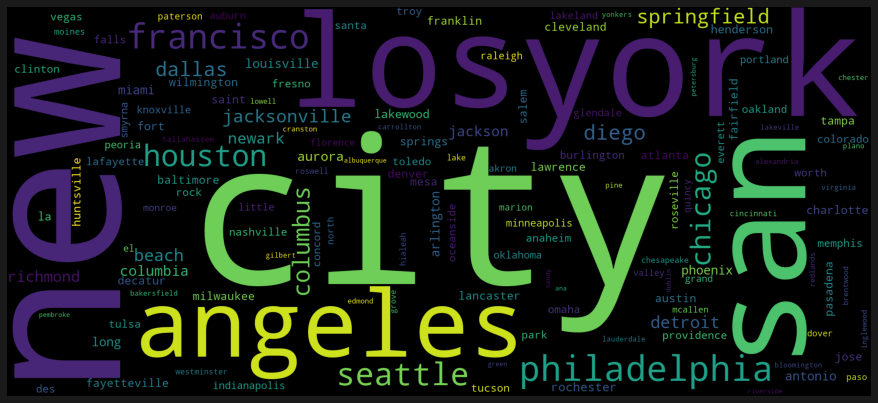

In [21]:
text = ' '.join(store_data['City'].str.lower())

wordcloud = WordCloud(width = 2000, height = 900, 
                      background_color ='black',
                      collocations=False,
                      max_words=5000,
                      min_font_size = 15).generate(text)
    
plt.figure(figsize=(12, 8), facecolor = 'k', edgecolor = 'k' )
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()

## **6.6- Top words in Sub-Category**

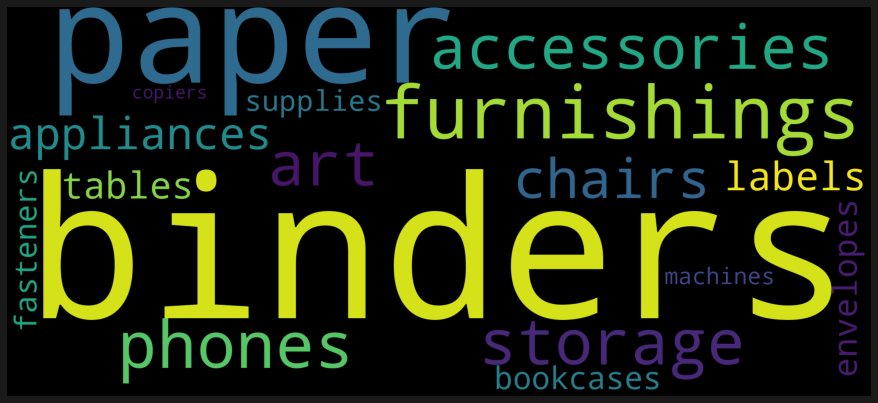

In [22]:
text = ' '.join(store_data['Sub-Category'].str.lower())

wordcloud = WordCloud(width = 2000, height = 900, 
                      background_color ='black',
                      collocations=False,
                      max_words=5000,
                      min_font_size = 15).generate(text)
    
plt.figure(figsize=(12, 8), facecolor = 'k', edgecolor = 'k' )
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()